In [30]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam, SGD
from keras.layers import BatchNormalization,GlobalMaxPooling2D

In [2]:
train_data = sio.loadmat('./Images/train_32x32.mat')
x_train = train_data['X']
y_train = train_data['y']

test_data = sio.loadmat('./Images/test_32x32.mat')
x_test = test_data['X']
y_test = test_data['y']


In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(32, 32, 3, 73257)
(73257, 1)
(32, 32, 3, 26032)
(26032, 1)


In [4]:
x_train, y_train = x_train.transpose((3,0,1,2)), y_train[:,0]
x_test, y_test = x_test.transpose((3,0,1,2)), y_test[:,0]

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape) 

(73257, 32, 32, 3)
(73257,)
(26032, 32, 32, 3)
(26032,)


In [6]:
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0

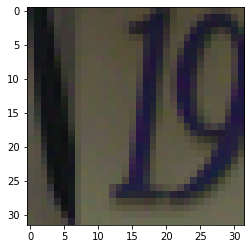

1


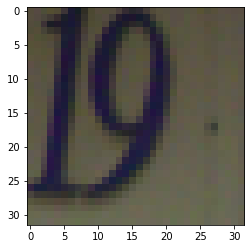

9


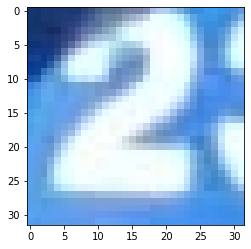

2


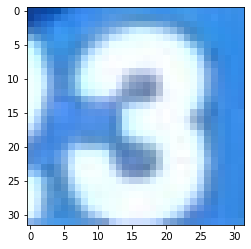

3


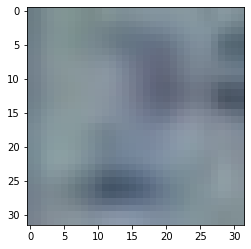

2


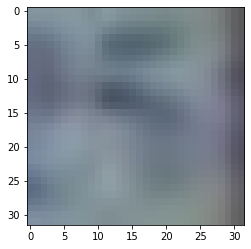

5


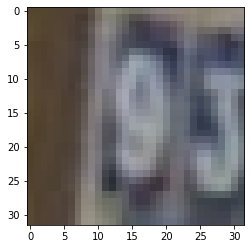

9


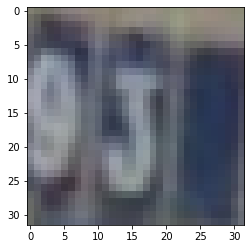

3


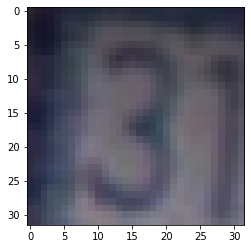

3


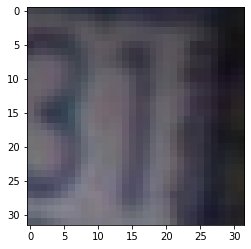

1


In [7]:
for i in range(10):
    plt.imshow(x_train[i])
    plt.show()
    print(y_train[i])

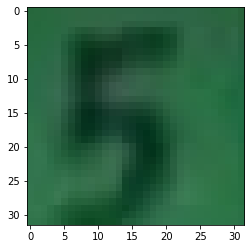

5


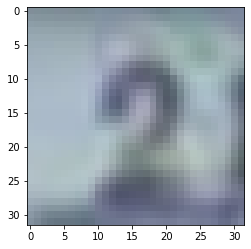

2


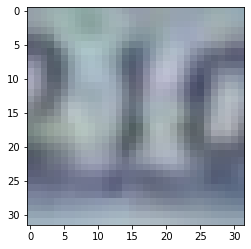

1


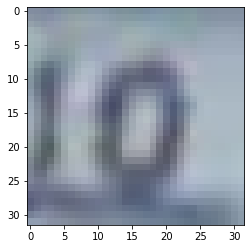

0


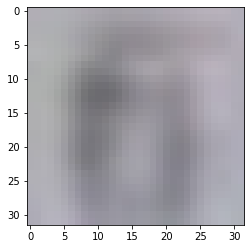

6


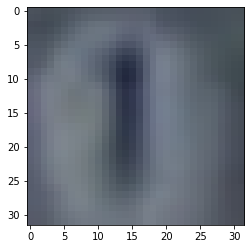

1


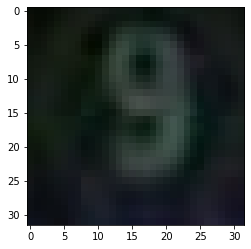

9


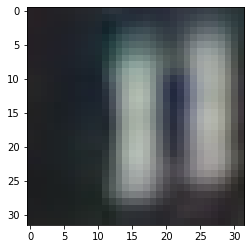

1


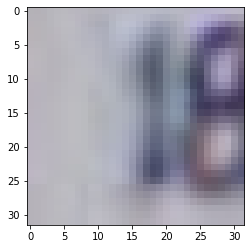

1


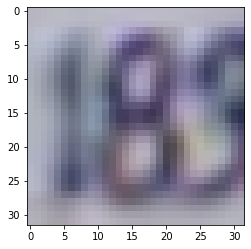

8


In [8]:
for i in range(10):
    plt.imshow(x_test[i])
    plt.show()
    print(y_test[i])

In [9]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [10]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255.0
x_test = x_test / 255.0

In [11]:
print("Train:",y_train.shape)
print("Test:",y_test.shape)

Train: (73257, 10)
Test: (26032, 10)


In [12]:
def rgb2gray(images):
    return np.expand_dims(np.dot(images, [0.2990, 0.5870, 0.1140]), axis=3)

In [13]:
x_train = rgb2gray(x_train).astype(np.float32)
x_test = rgb2gray(x_test).astype(np.float32)

In [15]:
print(x_train.shape)
print(x_test.shape)

(73257, 32, 32, 1)
(26032, 32, 32, 1)


In [27]:
x_train_mean = np.mean(x_train, axis = 0)
x_train_std = np.std(x_train, axis = 0)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_train_mean)/x_train_std

In [31]:
model1 = Sequential()
model1.add(Conv2D(32,(3,3),activation = 'relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Conv2D(64,(3,3),activation = 'relu'))
model1.add(MaxPooling2D(2,2))
model1.add(BatchNormalization())
model1.add(Conv2D(128,(3,3),activation = 'relu'))
model1.add(Flatten())
model1.add(Dense(128, activation = 'relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(100, activation = 'relu'))
model1.add(Dropout(0.5))
model1.add(Dense(10,activation = 'softmax'))
opt = Adam()
model1.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    

In [32]:
model1.fit(x_train,y_train,batch_size = 128, epochs = 25 , verbose = 1,validation_data = (x_test,y_test))

Train on 73257 samples, validate on 26032 samples
Epoch 1/25
73257/73257 [==============================] - 52s 705us/step - loss: 2.0540 - accuracy: 0.3417 - val_loss: 1.0946 - val_accuracy: 0.6978
Epoch 2/25
73257/73257 [==============================] - 54s 740us/step - loss: 1.0533 - accuracy: 0.6586 - val_loss: 0.7027 - val_accuracy: 0.7900
Epoch 3/25
73257/73257 [==============================] - 51s 697us/step - loss: 0.7700 - accuracy: 0.7612 - val_loss: 0.5505 - val_accuracy: 0.8381
Epoch 4/25
73257/73257 [==============================] - 55s 750us/step - loss: 0.6577 - accuracy: 0.7983 - val_loss: 0.5257 - val_accuracy: 0.8414
Epoch 5/25
73257/73257 [==============================] - 51s 697us/step - loss: 0.5981 - accuracy: 0.8193 - val_loss: 0.4897 - val_accuracy: 0.8505
Epoch 6/25
73257/73257 [==============================] - 49s 666us/step - loss: 0.5480 - accuracy: 0.8346 - val_loss: 0.4714 - val_accuracy: 0.8563
Epoch 7/25
73257/73257 [==============================] 

In [33]:
model1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 6, 6, 64)          256       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten_7 (Flatten)          (None, 2048)             

In [34]:
score1 = model1.evaluate(x_test,y_test)
print("Test loss: ",score1[0])
print("Test accuracy: ",score1[1])

26032/26032 [==============================] - 6s 232us/step
Test loss:  0.31586389857348335
Test accuracy:  0.9089581966400146


In [37]:
model2 = Sequential()
model2.add(Conv2D(16,(3,3),activation = 'relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(32,(3,3),activation = 'relu'))
model2.add(MaxPooling2D(2,2))
model2.add(Dropout(0.25))
model2.add(Conv2D(64,(3,3),activation = 'relu'))
model2.add(MaxPooling2D(2,2))
model2.add(Conv2D(128,(3,3),activation = 'relu'))
model2.add(MaxPooling2D(2,2))
model2.add(Flatten())
model2.add(Dense(128, activation = 'relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(10,activation = 'softmax'))
model2.compile(optimizer = Adam(),loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [38]:
model2.fit(x_train,y_train,batch_size=128,epochs=25,validation_data=(x_test,y_test))

Train on 73257 samples, validate on 26032 samples
Epoch 1/25
73257/73257 [==============================] - 93s 1ms/step - loss: 0.8866 - accuracy: 0.7217 - val_loss: 0.5078 - val_accuracy: 0.8571
Epoch 2/25
73257/73257 [==============================] - 91s 1ms/step - loss: 0.4398 - accuracy: 0.8708 - val_loss: 0.3564 - val_accuracy: 0.8947
Epoch 3/25
73257/73257 [==============================] - 91s 1ms/step - loss: 0.3602 - accuracy: 0.8932 - val_loss: 0.3162 - val_accuracy: 0.9087
Epoch 4/25
73257/73257 [==============================] - 94s 1ms/step - loss: 0.3211 - accuracy: 0.9064 - val_loss: 0.3080 - val_accuracy: 0.9073
Epoch 5/25
73257/73257 [==============================] - 102s 1ms/step - loss: 0.2898 - accuracy: 0.9160 - val_loss: 0.2680 - val_accuracy: 0.9221
Epoch 6/25
73257/73257 [==============================] - 95s 1ms/step - loss: 0.2710 - accuracy: 0.9212 - val_loss: 0.2581 - val_accuracy: 0.9247
Epoch 7/25
73257/73257 [==============================] - 90s 1ms/s

In [44]:
score2 = model2.evaluate(x_test,y_test)
print("Test loss: ",score2[0])
print("Test accuracy: ",score2[1])

26032/26032 [==============================] - 10s 390us/step
Test loss:  0.28134009489728357
Test accuracy:  0.9296250939369202
